In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import  StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

Load ACME Happiness Survey

In [2]:
df = pd.read_csv('ACME-HappinessSurvey2020.csv')

Visualize Correlation Between Features and Target Variable Y

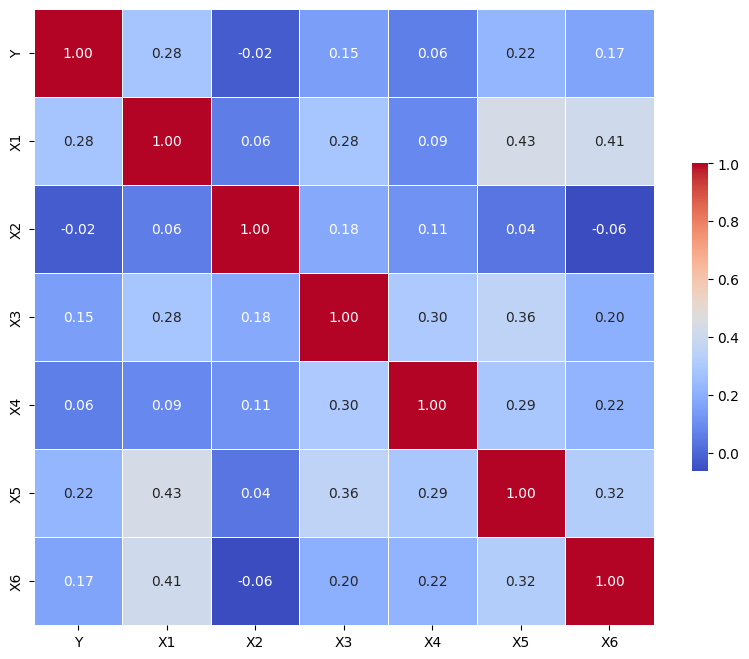

In [4]:
corr = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Drop Least Significant Features X2, X3, X4, X6

In [5]:
df = df.drop(['X2','X3','X4','X6'], axis=1)

Split into X Features and y target variable, then split into stratified training data and testing data

In [6]:
X = df.drop('Y', axis=1)
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Scale the Data with Standard Scalar

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Apply SMOTE to Balance the Data

In [8]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

Create Base Models with a RandomForestClassifier, and XGBoostClassifier

In [9]:
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBClassifier())
]

Introduce Final Estimator as Logistic Regression Model

In [10]:
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(C=1), cv=5)

Fit the Model, and Create Predictions

In [11]:
stacking_clf.fit(X_train_smote, y_train_smote)
y_pred = stacking_clf.predict(X_test_scaled)

Evaluate the model With a Classification Report

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8076923076923077
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.80      0.86      0.83        14

    accuracy                           0.81        26
   macro avg       0.81      0.80      0.81        26
weighted avg       0.81      0.81      0.81        26

